## HELP International Country Data

### Objectives:
- Help the NGO identify countries that requrire immeadiate aid

### Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Reading the dataset into python

In [2]:
df = pd.read_csv('Data/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Insights:
- The dataset contains socio-economic-health details of 167 countries
- The dataset contains no null values

### Exploratory Data Analysis

<AxesSubplot:>

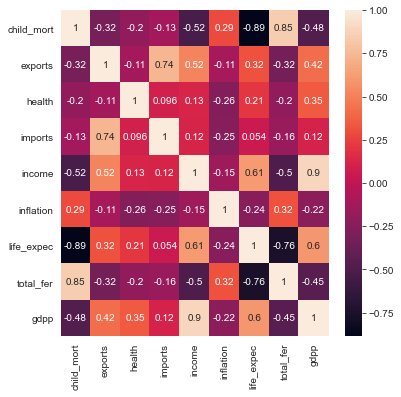

In [21]:
corr_matrix = df.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot= True)

### Observations:
- Life expectancy and Child mortality rate shows high negative correlation
- Child Mortality and total fertility rate shows high positive correlation
- GDP, Income and Life expectancy show high positive correlation

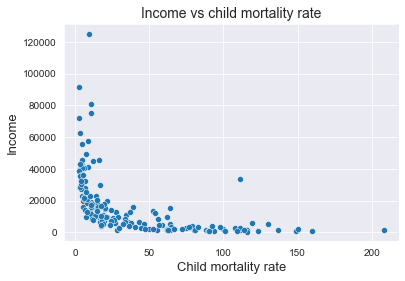

In [9]:
sns.set_style('darkgrid')
sns.scatterplot(x=df['child_mort'], y=df['income'])
plt.xlabel('Child mortality rate', fontsize=13)
plt.ylabel('Income', fontsize=13)
plt.title('Income vs child mortality rate', fontsize=14)
plt.show()

High Income countries show low child mortality rates

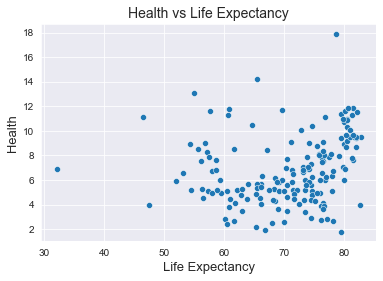

In [13]:
sns.set_style('darkgrid')
sns.scatterplot(x=df['life_expec'], y=df['health'])
plt.xlabel('Life Expectancy', fontsize=13)
plt.ylabel('Health', fontsize=13)
plt.title('Health vs Life Expectancy', fontsize=14)
plt.show()

- Most countries have average life expectancy greater than 60

Countries with life expectancy less than 50 years of age

In [67]:
df['country'].loc[df['life_expec'] < 50]

31    Central African Republic
66                       Haiti
87                     Lesotho
Name: country, dtype: object

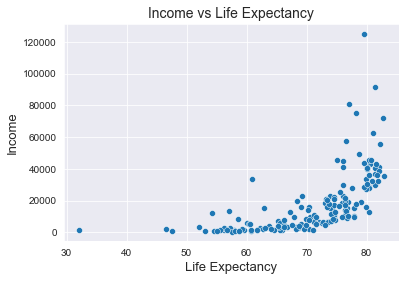

In [18]:
sns.set_style('darkgrid')
sns.scatterplot(x=df['life_expec'], y=df['income'])
plt.xlabel('Life Expectancy', fontsize=13)
plt.ylabel('Income', fontsize=13)
plt.title('Income vs Life Expectancy', fontsize=14)
plt.show()

High Income coutries show high life expectancy

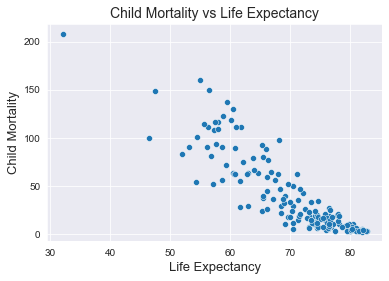

In [22]:
sns.set_style('darkgrid')
sns.scatterplot(x=df['life_expec'], y=df['child_mort'])
plt.xlabel('Life Expectancy', fontsize=13)
plt.ylabel('Child Mortality', fontsize=13)
plt.title('Child Mortality vs Life Expectancy', fontsize=14)
plt.show()

- Life expectancy shows negative trend in countries with high child mortality rates

### Scaling features

In [25]:
X = df.drop('country', axis=1)

In [26]:
scale = StandardScaler()
X = scale.fit_transform(X)

### K-means clustering

In [32]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\amalv\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


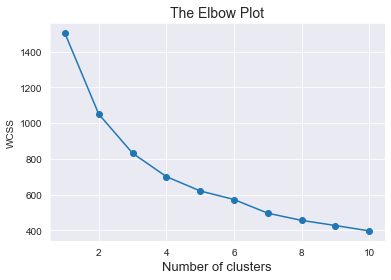

In [34]:
plt.plot(range(1, 11), wcss,marker='o')
plt.title('The Elbow Plot', fontsize=14)
plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('WCSS')
plt.show()

- From Elbow plot, we can see that from 4 number of clusters there is less decline in wcss value

**Using silhouette validation to validate ideal number of clusters**

In [36]:
score=[]
for i in range(2,10):
    k=KMeans(i)
    k.fit(X)
    score.append(np.round(silhouette_score(X,k.labels_),2))

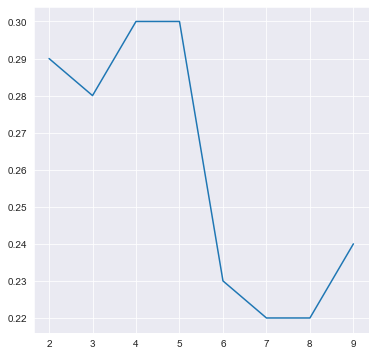

In [38]:
plt.figure(figsize=(6,6))
plt.plot(range(2,10),score)
plt.show()

- Silhouete score ranges between [-1, 1]
- From the plot, we see 4&5 number of clusters gives highest silhouette score
- We choose 4 as number of clusters

In [39]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

In [40]:
print(y_kmeans)

[1 0 0 1 0 0 0 2 2 0 0 0 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 0 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 3 0 1 1 0 0 1 3 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 3 0 2 0 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


In [45]:
len(y_kmeans)

167

In [47]:
unique, counts = np.unique(y_kmeans, return_counts=True)
dict(zip(unique, counts))

{0: 87, 1: 47, 2: 30, 3: 3}

- Cluster 0 has 87 countries
- Cluster 1 has 47 countries
- Cluster 2 has 30 countries
- Cluster 3 has 3 countries

Adding cluster as a feature to dataset

In [48]:
df['cluster'] = y_kmeans

In [49]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [50]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,0.694611
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809,0.826610
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,0.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,0.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,0.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,1.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,3.000000


#### Identifying Cluster with lowest socio-economic & health conditions

In [55]:
df[['country', 'cluster']].loc[df['child_mort'] > 100]

,country,cluster
3,Angola,1
17,Benin,1
25,Burkina Faso,1
28,Cameroon,1
31,Central African Republic,1
32,Chad,1
37,"Congo, Dem. Rep.",1
40,Cote d'Ivoire,1
49,Equatorial Guinea,1
63,Guinea,1


In [56]:
df[['country', 'cluster']].loc[df['life_expec'] < 50]

,country,cluster
31,Central African Republic,1
66,Haiti,1
87,Lesotho,1


In [61]:
df[['country', 'cluster']].loc[df['income'] < 1500]

,country,cluster
25,Burkina Faso,1
26,Burundi,1
31,Central African Republic,1
36,Comoros,1
37,"Congo, Dem. Rep.",1
50,Eritrea,1
63,Guinea,1
64,Guinea-Bissau,1
88,Liberia,1
93,Madagascar,1


In [63]:
df[['country', 'cluster', 'income']].loc[df['cluster'] == 3]

,country,cluster,income
91,Luxembourg,3,91700
98,Malta,3,28300
133,Singapore,3,72100


### Final Observations:
- Countries in cluster 1 has lowest socio-economic and health ratings
- Cluster 1 countries are the most eligible for immediate aid
- Cluster 3 are high income countries

### List of countries that require immeadiate aid

In [65]:
print(df['country'].loc[df['cluster']==1].to_list())

['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']
